In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset

import seaborn
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

np.random.seed(42)

**<span style="font-size: 20px;">№1. Работа с датасетом</span>**

In [63]:
df = load_dataset("mstz/wine")['train'].to_pandas()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Ссылка на датасет

https://huggingface.co/datasets/mstz/wine

In [64]:
# Пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  is_red                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [65]:
df.loc[df.isna().sum(axis=1) > 0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red


In [66]:
# Удаляем строку с пропусками
df = df.dropna(how='any')
len(df)

6497

In [67]:
duplicates = df[df.duplicated()]
print(f"Дубликаты строк: {len(duplicates)}")

Дубликаты строк: 1177


In [68]:
# Если есть дубликаты, удаляем их
if len(duplicates) > 0:
    df = df.drop_duplicates()
    print(f"Осталось строк после удаления дубликатов: {len(df)}")

Осталось строк после удаления дубликатов: 5320


In [69]:
# Выбираем только числовые признаки для анализа
track_df = df.select_dtypes('number')
track_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [70]:
track_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


**<span style="font-size: 16px;">Работа с выбросами</span>**

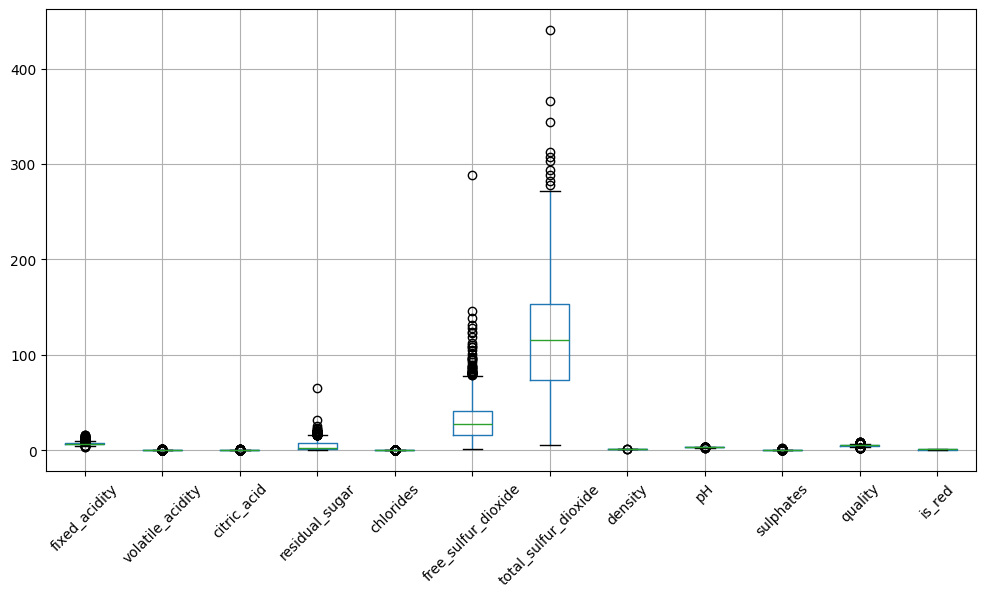

In [71]:
# Смотрим графики boxplot
track_df.drop('alcohol', axis=1).boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

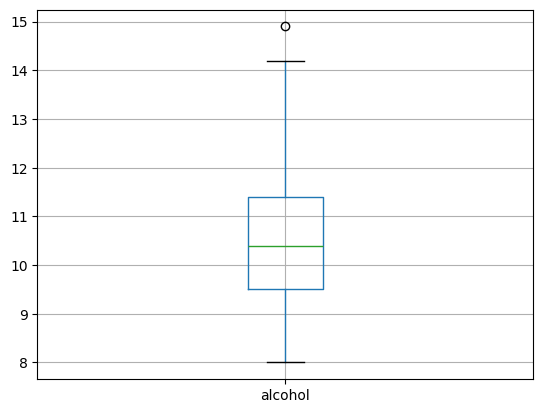

In [72]:
track_df[['alcohol']].boxplot()
plt.show()

In [73]:
def interquartile(df: pd.DataFrame):
    Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
    max_val, min_val = df.max(axis=0), df.min(axis=0)
    upper_bound = Q3 + (Q3 - Q1)*1.5
    lower_bound = Q1 - (Q3 - Q1)*1.5
    print("Границы по межквартильному расстоянию")
    for col in df.columns:
        print(col + ':\t\t' + str(((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()) + " выбросов")
        df.loc[df[col] < lower_bound[col], col] = max(lower_bound[col], min_val[col])
        df.loc[df[col] > upper_bound[col], col] = min(upper_bound[col], max_val[col])

    return df
    

def z_quantile(df: pd.DataFrame, threshold = 3.0):
    mean = df.mean(axis=0)
    bound = threshold * df.std(axis=0)
    max_val, min_val = df.max(axis=0), df.min(axis=0)
    print("Границы по z-преобразованию")
    for col in df.columns:
        print(col + ':\t\t' + str(((df[col] < mean[col] - bound[col]) | (df[col] > mean[col] + bound[col])).sum()) + " выбросов")
        df.loc[df[col] < mean[col] - bound[col], col] = max(mean[col] - bound[col], min_val[col])
        df.loc[df[col] > mean[col] + bound[col], col] = min(mean[col] + bound[col], max_val[col])
    
    return df

Границы по межквартильному расстоянию
fixed_acidity:		304 выбросов
volatile_acidity:		279 выбросов
citric_acid:		143 выбросов
residual_sugar:		141 выбросов
chlorides:		237 выбросов
free_sulfur_dioxide:		44 выбросов
total_sulfur_dioxide:		10 выбросов
density:		3 выбросов
pH:		49 выбросов
sulphates:		163 выбросов
alcohol:		1 выбросов
quality:		183 выбросов
is_red:		0 выбросов


C:\Users\PC1\AppData\Local\Temp\ipykernel_4904\2004420064.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound[col], col] = max(lower_bound[col], min_val[col])


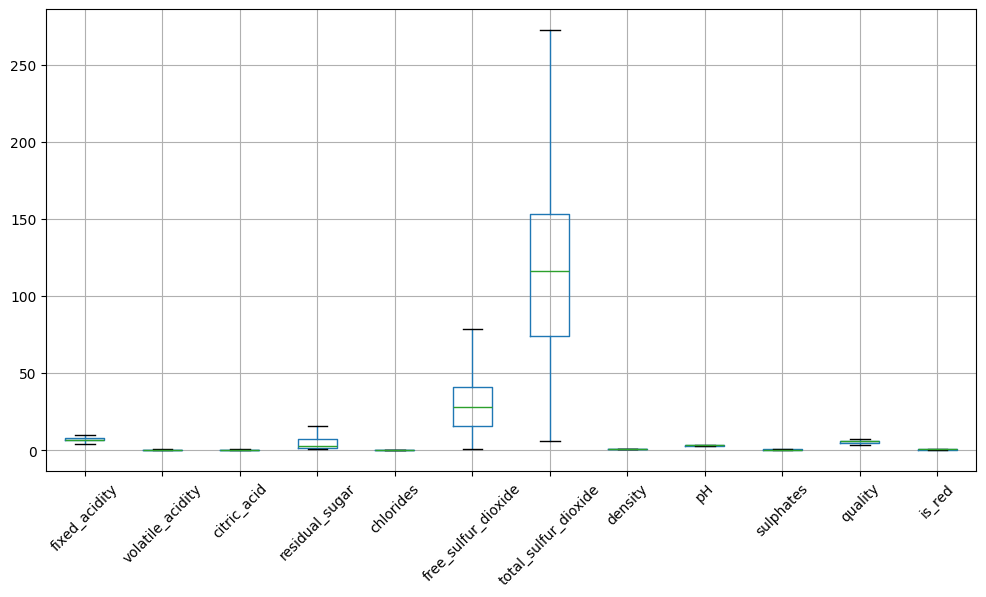

In [74]:
interquartile(track_df.copy()).drop('alcohol', axis=1).boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

Границы по z-преобразованию
fixed_acidity:		456 выбросов
volatile_acidity:		493 выбросов
citric_acid:		680 выбросов
residual_sugar:		539 выбросов
chlorides:		200 выбросов
free_sulfur_dioxide:		383 выбросов
total_sulfur_dioxide:		734 выбросов
density:		551 выбросов
pH:		606 выбросов
sulphates:		405 выбросов
alcohol:		555 выбросов
quality:		389 выбросов
is_red:		1359 выбросов


C:\Users\PC1\AppData\Local\Temp\ipykernel_4904\2004420064.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.423232189088959' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < mean[col] - bound[col], col] = max(mean[col] - bound[col], min_val[col])
C:\Users\PC1\AppData\Local\Temp\ipykernel_4904\2004420064.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06414631586562769' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < mean[col] - bound[col], col] = max(mean[col] - bound[col], min_val[col])


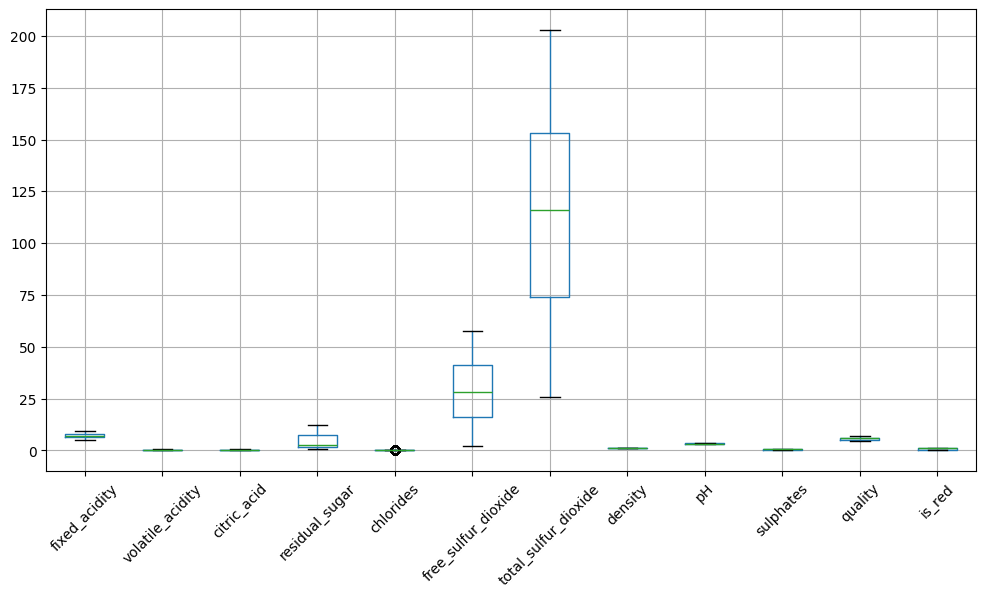

In [75]:
z_quantile(track_df.copy(), 1.56).drop('alcohol', axis=1).boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

Границы по межквартильному расстоянию
fixed_acidity:		304 выбросов
volatile_acidity:		279 выбросов
citric_acid:		143 выбросов
residual_sugar:		141 выбросов
chlorides:		237 выбросов
free_sulfur_dioxide:		44 выбросов
total_sulfur_dioxide:		10 выбросов
density:		3 выбросов
pH:		49 выбросов
sulphates:		163 выбросов
alcohol:		1 выбросов
quality:		183 выбросов
is_red:		0 выбросов


C:\Users\PC1\AppData\Local\Temp\ipykernel_4904\2004420064.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound[col], col] = max(lower_bound[col], min_val[col])


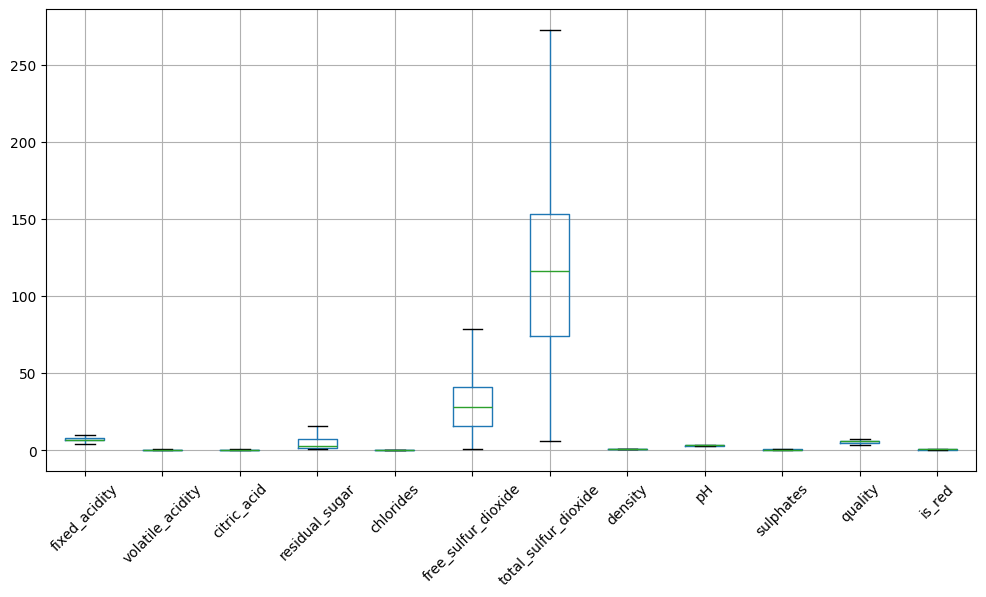

In [76]:
interquartile(track_df)
track_df.drop("alcohol", axis=1).boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

**<span style="font-size: 20px;">№2. Подбор признаков</span>**

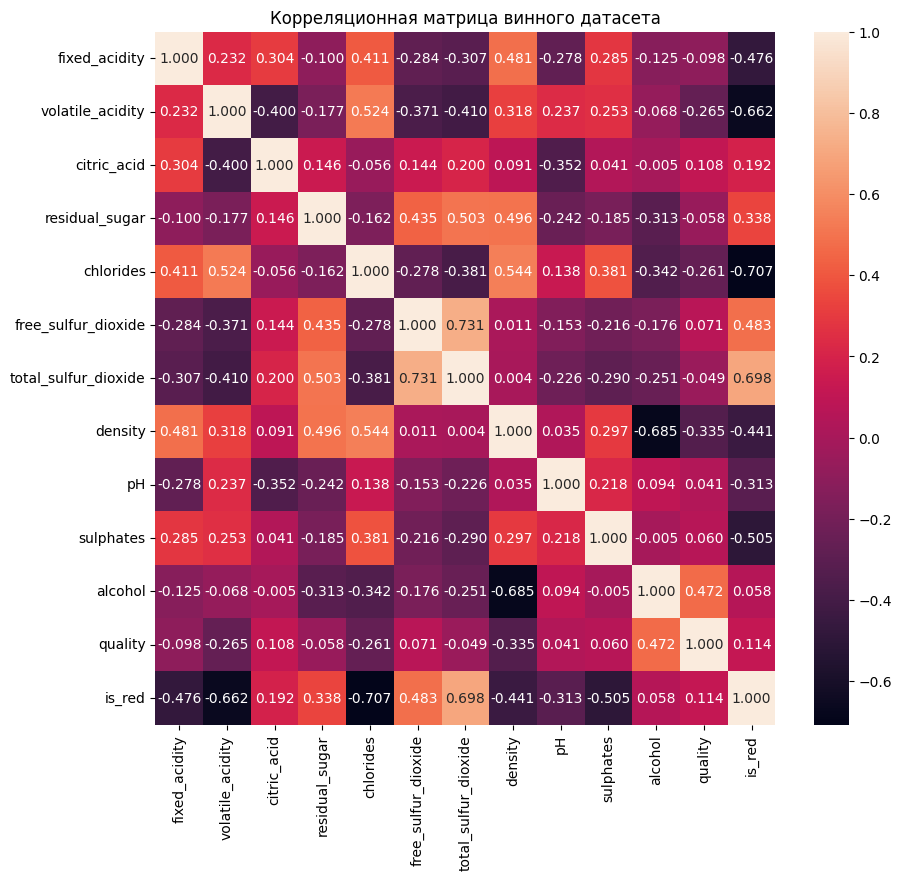

In [77]:
# Смотрим, какие признаки коррелируют с другими
plt.figure(figsize=(10, 9))
seaborn.heatmap(track_df.corr(), annot=True, fmt=".3f")
plt.title("Корреляционная матрица винного датасета")
plt.show()

In [78]:
target_corr = track_df.corr()['quality'].abs().sort_values(ascending=False)
print("\nКорреляция всех признаков с качеством вина (по убыванию):")
print(target_corr)


Корреляция всех признаков с качеством вина (по убыванию):
quality                 1.000000
alcohol                 0.472107
density                 0.335228
volatile_acidity        0.264548
chlorides               0.260834
is_red                  0.113924
citric_acid             0.108045
fixed_acidity           0.098477
free_sulfur_dioxide     0.071446
sulphates               0.060059
residual_sugar          0.058179
total_sulfur_dioxide    0.049168
pH                      0.040649
Name: quality, dtype: float64


In [79]:
# Устанавливаем порог корреляции (можно менять)
corr_threshold = 0.05
selected_features = target_corr[target_corr > corr_threshold].index.tolist()
selected_features.remove('quality')  # Убираем сам таргет

print(f"\nОтобрано признаков с корреляцией > {corr_threshold}: {len(selected_features)}")
print("Отобранные признаки:", selected_features)


Отобрано признаков с корреляцией > 0.05: 10
Отобранные признаки: ['alcohol', 'density', 'volatile_acidity', 'chlorides', 'is_red', 'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar']


In [80]:
# Выберем в качестве таргета 'quality' (качество вина)
x, y = track_df.drop('quality', axis=1), track_df[['quality']]
features = x.columns.to_numpy()

target_scaler = MinMaxScaler()
ds_scaler = StandardScaler()

# Нормализация данных
x = pd.DataFrame(ds_scaler.fit_transform(x), columns=x.columns)
y = target_scaler.fit_transform(y)

In [81]:
# Обучение модели на данных и возврат RMSE 
def get_score(modelClass, x, y, **model_args) -> float:
    model = modelClass(**model_args)
    model.fit(x, y)
    return root_mean_squared_error(y, model.predict(x))

# Подбор набора признаков через жадный поиск вперёд, т. е. добавление признаков
def greedy_search_forward(modelClass, x, y, features, **model_args):
    queue = [[f] for f in features]
    best_score, best_features = float("inf"), set()
    curr_best_score, curr_best_features = float("inf"), set()
    while True:
        curr_f = queue.pop(0)
        score = get_score(modelClass, x[curr_f], y, **model_args)
        if score < best_score:
            best_score = score
            best_features = curr_f
            print(best_score)
        
        if score < curr_best_score:
            curr_best_score = score
            curr_best_features = curr_f
        
        if len(curr_f) == len(features):
            break

        if len(queue) == 0:
            queue = [list(set(curr_best_features) | set([f])) for f in set(features) - set(curr_best_features)]
            curr_best_score, curr_best_features = float("inf"), set()
    
    return best_features, best_score

In [82]:
# Подбираем признаки по метрике RMSE
best_features, best_score = greedy_search_forward(Ridge, x, y, features)
print(best_features, '\n', best_score, sep='')

0.20785870894941175
0.20143233860599194
0.19678790282598183
0.18413103111261456
0.18352604054114532
0.18307356506824396
0.18268374596548093
0.18118437423884579
0.17757096709587708
0.17741878735932692
0.17730319406363307
0.1768490094547058
0.17561789437021133
0.1756100119765823
0.17506723493491885
0.17461360752723182
0.1736338654434387
0.1731610721834651
0.17310328259509417
0.1730777961115764
0.1729764318867513
0.17288782853569348
0.17261250677668008
0.17250816234963717
0.17230734217963545
0.17223922345450715
0.17217252627579133
['total_sulfur_dioxide', 'residual_sugar', 'density', 'sulphates', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'alcohol', 'is_red', 'volatile_acidity', 'pH', 'fixed_acidity']
0.17217252627579133


In [83]:
# Проверяем метрику
get_score(Ridge, x[best_features], y)

0.17217252627579133

In [84]:
# Чем лучший набор отличается от набора всех признаков?
set(features) - set(best_features)

set()

**<span style="font-size: 20px;">№3. Работа с моделью</span>**

In [85]:
model = Ridge()
model.fit(x[features], y)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


**<span style="font-size: 16px;">Метрики</span>**

In [86]:
# Преобразуем значения обратно, для более корректных значений метрик (интерпретации результата)
y = target_scaler.inverse_transform(y)

In [87]:
y_pred = target_scaler.inverse_transform(model.predict(x[features]).reshape((x.shape[0], 1)))

print('RMSE:', root_mean_squared_error(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('MAPE:', mean_absolute_percentage_error(y, y_pred))
print('R^2:', r2_score(y, y_pred))

RMSE: 0.6886901051031653
MAE: 0.5437218181309984
MAPE: 0.09778876199118745
R^2: 0.32054763716561174


Оценка метрик:
- R² = 0.32 - низкая объясняющая способность
- MAPE = 9.8% - хорошая относительная точность
- Ошибка ~0.6 балла на шкале 3-9

Проблема: Линейная модель слишком проста для нелинейных зависимостей в данных.

Причина: Ridge регрессия не улавливает сложные взаимосвязи между химическими показателями и субъективной оценкой качества.

Решение: Использовать нелинейные модели (Random Forest, Gradient Boosting) или добавить полиномиальные признаки.